# Intro to Neural Networks in Python with Keras

Neural Networks are state-of-the-art when it comes to predictive modeling of complex data. In this notebook, we show the basic syntax to create a neural network using the Keras library on top of Tensorflow.

#### About Tensorflow
Tensorflow is an open-source framework for building neural networks. Originally developed by Google Brain, Tensorflow's method of building neural networks is through manipulation of "tensors", which are similar to vectors.

https://www.tensorflow.org/


#### About Keras
Keras is a front-end library designed to make neural network design and implementation simple. Keras itself doesn't build the neural networks defined by the user - instead, it takes the description of the architecture from the user and ships the work off to a dedicated back-end, such as Tensorflow. The simple and Pythonic syntax of Keras has helped to democratize neural network usage, where Tensorflow can be pedantic and tiresome.

https://keras.io/


#### About the Data
We'll use a data set from Lending Club for this notebook. The dataset contains information on loans that were handed out, such as demographic information about the lendee, length of the loan, employment history, and interest rate. This data is stored in a csv called `LoanStats.csv` in the same folder as this notebook. You can also download yourself from https://www.lendingclub.com/info/download-data.action.


#### How to Run This Code
Within the folder containing this file should be a file called `requirements.txt`. Create a new Python 3.6 environment with virtualenv (`python3 -m virtualenv < name your env >`) or conda (`conda create -n < name your env > python=3.6`). Activate your environment, and once you've done so, use pip to install the necessary packages from `requirements.txt` like this: `pip install -r requirements.txt`. You may need to change directory locations for this to work. If you're a conda user, you can import the entire virtual environment from the `environment.yml` file found in the same directory.

Once you've got the packages installed, you can download this notebook from this Github repo by finding the appropriate folder: https://github.com/JaredStufft/instructionals. Alternatively, you can fork and `git clone` the whole repo if you'd like. Navigate using the command line to the location of the notebook, and run `jupyter-notebook` in your terminal to start up Jupyter. You should be able to use the file browser within Jupyter to open the notebook.


#### A Note
If you're used to writing Python already, you may find some of the formatting odd in this notebook, such as importing libraries in the middle of our code rather than all at the top. I do this to demonstrate when a library becomes necessary to use. At the bottom, I'll compile the whole script into one cell in a more Pythonic way.


## Accessing the Data
The data set is stored in the same parent directory as this notebook. We can use `pandas` to extract this into an in-memory structure called a dataframe using the `from_csv` method by passing the file name as an argument.

In [1]:
import pandas as pd  # Customary to alias pandas as 'pd'

data = pd.read_csv('LoanStats.csv')

print(f'The "data" object is this type: {type(data)}')  # Stored in a dataframe object

data.head()  # Calling the .head() method on the dataframe object shows us by default the first five rows of the dataframe.

The "data" object is this type: <class 'pandas.core.frame.DataFrame'>


,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,...,0,5863.155187,5833.84,5000.00,863.16,0.00,0.0,0.00,Jan-15,171.62
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,...,0,1014.530000,1014.53,456.46,435.17,0.00,122.9,1.11,Apr-13,119.66
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,...,0,3005.666844,3005.67,2400.00,605.67,0.00,0.0,0.00,Jun-14,649.91
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,...,0,12231.890000,12231.89,10000.00,2214.92,16.97,0.0,0.00,Jan-15,357.48
4,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,...,0,4066.908161,4066.91,3000.00,1066.91,0.00,0.0,0.00,Jan-17,67.30


So we've imported the data into memory with `pandas` and used the `.head()` method on our dataframe object to take a look at the colomns we have. We can see at the bottom that there's 45 total columns in the data set, but `.head()` is only showing a subset. We can change this by using calling `pd.set_option()` and passing the option name and what we'd like to change it to at the top of our script or notebook. For now, we'll leave it alone.


## Our Objective
Previous to this notebook, we've talked about neural networks and how we can use them to predict values based on a data set. Today, we'll build a simple neural network and train it to predict the total money received by the bank (stored in the `total_pymnt` column) for a loan when presented with information about the lendee and the loan.


## First Step: Some Simple Cleaning
Our data set is pretty nice, but we can immediately see some issues - our `int_rate` variable seems to be a string with a percent sign. We also see some other text data present. This is important to handle - machine learning models typically can only be directly trained on numerical input, so we have to take our non-numerical data and transform it into numerical data. We can choose a subset of the columns to use for today and see what the datatypes in the dataframe are by using the `.info()` method on the dataframe object:

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42535 entries, 0 to 42534
Data columns (total 45 columns):
loan_amnt                  42535 non-null int64
funded_amnt                42535 non-null int64
funded_amnt_inv            42535 non-null float64
term                       42535 non-null object
int_rate                   42535 non-null object
installment                42535 non-null float64
grade                      42535 non-null object
sub_grade                  42535 non-null object
emp_title                  39909 non-null object
emp_length                 41423 non-null object
home_ownership             42535 non-null object
annual_inc                 42531 non-null float64
verification_status        42535 non-null object
issue_d                    42535 non-null object
loan_status                42535 non-null object
pymnt_plan                 42535 non-null object
url                        0 non-null float64
desc                       29242 non-null object
purpose    

So our suspicion is true - `int_rate` is indeed a string that we need to convert into a float for use in our model. We can also, just for now, pick a handful of other variables to use as inputs for our model. I'll pick some now - we'll use:

* `loan_amnt`
* `term`
* `emp_length`
* `home_ownership`
* `annual_inc`
* `verification_status`
* `issue_d`
* `dti`
* `delinq_2yrs`
* `earliest_cr_line`
* `inq_last_6mths`
* `open_acc`
* `revol_bal`
* `revol_util`
* `total_acc`
* `int_rate`
* `total_pymnt`

Let's extract these variables into a new dataframe.

In [3]:
# Make a list of the column names we want to keep
keep_vars = [
    'loan_amnt',
    'term',
    'emp_length',
    'home_ownership',
    'annual_inc',
    'verification_status',
    'issue_d',
    'dti',
    'delinq_2yrs',
    'earliest_cr_line',
    'inq_last_6mths',
    'open_acc',
    'revol_bal',
    'revol_util',
    'total_acc',
    'int_rate',
    'total_pymnt'
]

smaller_data = data[keep_vars]  # Subset the dataframe and assign to a new variable with square brackets

smaller_data.info()
smaller_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42535 entries, 0 to 42534
Data columns (total 17 columns):
loan_amnt              42535 non-null int64
term                   42535 non-null object
emp_length             41423 non-null object
home_ownership         42535 non-null object
annual_inc             42531 non-null float64
verification_status    42535 non-null object
issue_d                42535 non-null object
dti                    42535 non-null float64
delinq_2yrs            42506 non-null float64
earliest_cr_line       42506 non-null object
inq_last_6mths         42506 non-null float64
open_acc               42506 non-null float64
revol_bal              42535 non-null int64
revol_util             42445 non-null object
total_acc              42506 non-null float64
int_rate               42535 non-null object
total_pymnt            42535 non-null float64
dtypes: float64(7), int64(2), object(8)
memory usage: 5.5+ MB


,loan_amnt,term,emp_length,home_ownership,annual_inc,verification_status,issue_d,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,revol_bal,revol_util,total_acc,int_rate,total_pymnt
0,5000,36 months,10+ years,RENT,24000.0,Verified,Dec-11,27.65,0.0,Jan-85,1.0,3.0,13648,83.70%,9.0,10.65%,5863.155187
1,2500,60 months,< 1 year,RENT,30000.0,Source Verified,Dec-11,1.00,0.0,Apr-99,5.0,3.0,1687,9.40%,4.0,15.27%,1014.530000
2,2400,36 months,10+ years,RENT,12252.0,Not Verified,Dec-11,8.72,0.0,Nov-01,2.0,2.0,2956,98.50%,10.0,15.96%,3005.666844
3,10000,36 months,10+ years,RENT,49200.0,Source Verified,Dec-11,20.00,0.0,Feb-96,1.0,10.0,5598,21%,37.0,13.49%,12231.890000
4,3000,60 months,1 year,RENT,80000.0,Source Verified,Dec-11,17.94,0.0,Jan-96,0.0,15.0,27783,53.90%,38.0,12.69%,4066.908161


Voila. We have a smaller data set with only the columns we need. Let's clean this up and transform some data into something we can use.

Our first cleaning step is to deal with missing data. In the real-world, missing data is almost always an issue. We have some different strategies to deal with this, such as _imputation_, where we infer the missing values in an intelligent way. For today, we don't have much missing data. We'll do the easiest thing and just drop them:

In [4]:
row_count_before = len(smaller_data)  # Use len() to get number of rows

smaller_data = smaller_data.dropna(how='any')

row_count_after = len(smaller_data)

print(f'We dropped {row_count_before - row_count_after} rows from our data set due to missing data.')

We dropped 1199 rows from our data set due to missing data.


Next, we'll transform some of our variables into usable formats.

In [5]:
# Strip '%' from int_rate and revol_util and convert to a float
smaller_data['int_rate'] = smaller_data['int_rate'].str.replace('%', '').astype(float)
smaller_data['revol_util'] = smaller_data['revol_util'].str.replace('%', '').astype(float)

# Turn issue_d and earliest_cr_line into real datetime objects
from time import strptime
smaller_data['issue_d'] = pd.to_datetime(smaller_data['issue_d'], format='%b-%y')
smaller_data['earliest_cr_line'] = pd.to_datetime(smaller_data['earliest_cr_line'], format='%b-%y')

# Create a new column indicating the age of the oldest credit line
smaller_data['oldest_cr_age'] = smaller_data['issue_d'] - smaller_data['earliest_cr_line']
smaller_data['oldest_cr_age'] = smaller_data['oldest_cr_age'].dt.days

smaller_data.drop(['issue_d', 'earliest_cr_line'], axis=1, inplace=True)  # Get rid of date columns

# Rescale data to standard normal range using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

numeric_cols = [col for col in smaller_data._get_numeric_data().columns if col != 'total_pymnt']

smaller_data[numeric_cols] = scaler.fit_transform(smaller_data[numeric_cols])

# Let's see what we've got so far
smaller_data.info()
smaller_data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41336 entries, 0 to 42513
Data columns (total 16 columns):
loan_amnt              41336 non-null float64
term                   41336 non-null object
emp_length             41336 non-null object
home_ownership         41336 non-null object
annual_inc             41336 non-null float64
verification_status    41336 non-null object
dti                    41336 non-null float64
delinq_2yrs            41336 non-null float64
inq_last_6mths         41336 non-null float64
open_acc               41336 non-null float64
revol_bal              41336 non-null float64
revol_util             41336 non-null float64
total_acc              41336 non-null float64
int_rate               41336 non-null float64
total_pymnt            41336 non-null float64
oldest_cr_age          41336 non-null float64
dtypes: float64(12), object(4)
memory usage: 5.4+ MB


,loan_amnt,term,emp_length,home_ownership,annual_inc,verification_status,dti,delinq_2yrs,inq_last_6mths,open_acc,revol_bal,revol_util,total_acc,int_rate,total_pymnt,oldest_cr_age
0,-0.832216,36 months,10+ years,RENT,-0.709443,Verified,2.123380,-0.297934,-0.055107,-1.419267,-0.034429,1.214425,-1.137365,-0.417550,5863.155187,1.902082
1,-1.169331,60 months,< 1 year,RENT,-0.616481,Source Verified,-1.844848,-0.297934,2.555661,-1.419267,-0.574838,-1.407304,-1.569159,0.831659,1014.530000,-0.098957
2,-1.182815,36 months,10+ years,RENT,-0.891463,Not Verified,-0.695327,-0.297934,0.597585,-1.641960,-0.517503,1.736653,-1.051006,1.018229,3005.666844,-0.462397
3,-0.157986,36 months,10+ years,RENT,-0.319002,Source Verified,0.984283,-0.297934,-0.055107,0.139587,-0.398135,-0.997989,1.280684,0.350362,12231.890000,0.345248
4,-1.101908,60 months,1 year,RENT,0.158204,Source Verified,0.677546,-0.297934,-0.707799,1.253055,0.604204,0.162910,1.367042,0.134049,4066.908161,0.357171


Looking better. We've converted our percents to numerical values and have used the dates to get the age of the oldest credit line in days rather than having date columns. We've also conformed all the numerical variables to the same standard normal scale using `StandardScaler`. We now need to deal with our truly categorical/string data: `term`, `emp_length`, `home_ownership`, and `verification_status`.

We can't give these columns to the model as is. There's a couple different strategies, but the most common is called **One Hot Encoding** or **Dummy Variables**. To convert, for each categorical/string variable and for each value it could take, we'll create a new column. This column will either take the value 1 or 0: 1 if this particular observation _is_ in that category, and _zero_ if not. Traditional statistical models will require you to create 1-n dummy variables, where n is the number of categories that could be present in that variable, but a neural network doesn't have this requirement. We can use the `get_dummies()` method from `pandas` to achieve this quickly.

In [6]:
data_with_dummies = pd.get_dummies(smaller_data, dtype=float)

data_with_dummies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41336 entries, 0 to 42513
Data columns (total 33 columns):
loan_amnt                              41336 non-null float64
annual_inc                             41336 non-null float64
dti                                    41336 non-null float64
delinq_2yrs                            41336 non-null float64
inq_last_6mths                         41336 non-null float64
open_acc                               41336 non-null float64
revol_bal                              41336 non-null float64
revol_util                             41336 non-null float64
total_acc                              41336 non-null float64
int_rate                               41336 non-null float64
total_pymnt                            41336 non-null float64
oldest_cr_age                          41336 non-null float64
term_ 36 months                        41336 non-null float64
term_ 60 months                        41336 non-null float64
emp_length_1 year      

Okay, we're finally ready for the fun part where we get to build a model! The first thing we'll do is separate our target variable from the predictor variables. Next, we convert our dataframe objects into `array` objects from the `numpy` package. Then, we'll split our data into to sets: `train` and `test`. A good predictive model is able to take what it learns on one data set and predict just as well on data that it's never seen before. This is the purpose of splitting the data this way; we use the `train` set to train the model, and the `test` set to evaluate. Finally, we'll start to build the architecture of the model and get to training.

In [7]:
import numpy as np
from sklearn.model_selection import train_test_split

X_vars = [
    'loan_amnt',
    'annual_inc',
    'dti',
    'delinq_2yrs',
    'inq_last_6mths',
    'open_acc',
    'revol_bal',
    'revol_util',
    'total_acc',
    'oldest_cr_age',
    'term_ 36 months',
    'term_ 60 months',
    'emp_length_1 year',
    'emp_length_10+ years',
    'emp_length_2 years',
    'emp_length_3 years',
    'emp_length_4 years',
    'emp_length_5 years',
    'emp_length_6 years',
    'emp_length_7 years',
    'emp_length_8 years',
    'emp_length_9 years',
    'emp_length_< 1 year',
    'home_ownership_MORTGAGE',
    'home_ownership_NONE',
    'home_ownership_OTHER',
    'home_ownership_OWN',
    'home_ownership_RENT',
    'verification_status_Not Verified',
    'verification_status_Source Verified',
    'verification_status_Verified',
    'int_rate'
]

# Separate into X and y - a dataframe containing the independent variables and the dependent variable, respectively.
X = np.array(data_with_dummies[X_vars])
y = np.array(data_with_dummies['total_pymnt'])

# split into Train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.35)  # Put 235% of the data in the test set

# Check it out
print(X_train)
print('-'*30)
print(y_train)

[[-0.15798606  0.77795122 -0.82784964 ...  0.          1.
  -1.83169865]
 [ 0.51624369  0.57659522  1.69454348 ...  0.          1.
  -0.59330487]
 [-0.96706176 -0.18265758  1.03193136 ...  1.          0.
  -0.59330487]
 ...
 [ 0.13867503 -0.52351876  0.99470596 ...  0.          0.
  -0.59600879]
 [-1.23675366 -0.49253138  0.47503937 ...  0.          0.
  -0.22557222]
 [-0.15798606  0.20158594 -1.03631188 ...  0.          1.
  -0.4337738 ]]
------------------------------
[10858.61103  17424.26842   4646.467722 ... 13581.77834   2073.250262
 11038.14891 ]


## Defining our architecture using Keras

Building a neural network using Keras is simple and modular. We start by defining our `model`, then adding our different layers, and finally, compiling the model into something trainable. Let's see:

In [73]:
from keras.models import Sequential  # Sequential model means one layer comes after another in sequence.
from keras.layers import Dense  # Dense layers mean the nodes are all fully connected to one another.
from keras.callbacks import Callback, EarlyStopping  # Let's us run some code in between batches

# There's a couple different ways to construct the model architecture. We can do it like this:

# Define model
model = Sequential()  

# Add layers one by one. 
model.add(Dense(32, input_dim=32))  # input_dim is # of vars in input layer - only used in the first layer
model.add(Dense(15, activation='relu'))  # One hidden layer with 15 nodes
model.add(Dense(1))  # Output layer - regression task so only need one node like in our earlier example

# Compile the model
model.compile(
    loss='mse',  # Use Mean Squared Error as the loss/cost function
    optimizer='adam',  # ADAM is a variation on gradient descent. It's general purpose and works well.
    metrics=['mse', 'mae']  # Display Mean Squared Error and Mean Absolute Error while training.
)


# OR, we can define a dictionary with these attributes and iterate.
nn_dict = {
    'n_nodes': [32, 15, 1],
    'activation': ['relu', 'relu', None]
}

n_layers = 3

model = Sequential()

for i in range(n_layers):
    
    if i == 0:  # If the first layer (input layer)
        layer = Dense(nn_dict['n_nodes'][i], input_dim=nn_dict['n_nodes'][i], activation=nn_dict['activation'][i])
        
    layer = Dense(nn_dict['n_nodes'][i], activation=nn_dict['activation'][i])
    
    model.add(layer)
    
model.compile(
    loss='mse', 
    optimizer='adamax',
    metrics=['mse', 'mae']
)

# Print the layers
for layer in model.layers:
    print(layer)

A _Callback_ is essentially a function that we can define which will execute while the model is being trained. This way we can get custom output. We'll define a callback that let's us see what the model is predicting each time.

In [74]:
# Create a custom Callback to get model predictions
class Predictor(Callback):
    
    def on_train_begin(self, logs={}):
        
        self.val_predictions = []
        self.i = 1
    
    def on_batch_end(self, batch, logs={}):
        
        if i==1 or self.i % 250 == 0:
            self.val_predictions.append(self.model.predict(X_test))

        self.i += 1

Alright! Let's get to training our data. If you're familiar at all with `scikit-learn`, then the syntax will feel pretty familiar with you. To fit/train a model, we call the `.fit()` method with the training data as arguments. To predict, we use the `.predict()` method. We can also store how our model is performing through each propagation cycle by assigning the returned object of `.fit()` method to an object.

In [75]:
predictor = Predictor()
es = EarlyStopping( # Another callback that stops our training process early if val_loss doesn't improve
    patience=2,  # Checks for improvement over 2 epochs
    verbose=1
)  

history = model.fit(
    X_train,  # Independent variables
    y_train,  # Dependent Variable
    validation_data=(X_test, y_test),  # Test data as a tuple
    epochs=25,  # One epoch is a complete pass through the data
    shuffle=True,  # Shuffle the dataset before training
    batch_size=20,
    callbacks = [predictor, es]
)

Train on 26868 samples, validate on 14468 samples
Epoch 1/25
26868/26868 [==============================] - 3s 110us/step - loss: 202120955.3533 - mean_squared_error: 202120955.3533 - mean_absolute_error: 11054.1205 - val_loss: 125839035.3608 - val_mean_squared_error: 125839035.3608 - val_mean_absolute_error: 8031.6258
Epoch 2/25
26868/26868 [==============================] - 3s 95us/step - loss: 61896673.1987 - mean_squared_error: 61896673.1987 - mean_absolute_error: 5563.9690 - val_loss: 36773452.9190 - val_mean_squared_error: 36773452.9190 - val_mean_absolute_error: 4510.1297
Epoch 3/25
26868/26868 [==============================] - 3s 100us/step - loss: 29833604.1720 - mean_squared_error: 29833604.1720 - mean_absolute_error: 3920.8882 - val_loss: 25513985.5551 - val_mean_squared_error: 25513985.5551 - val_mean_absolute_error: 3484.1485
Epoch 4/25
26868/26868 [==============================] - 2s 89us/step - loss: 22554298.1080 - mean_squared_error: 22554298.1080 - mean_absolute_err

So far so good - we've constructed the architecture of our neural network and we've trained it for 15 epochs! We can get an overview of the model and the layers we've created using the `.summary()` method on the model now: 

In [76]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_41 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_42 (Dense)             (None, 15)                495       
_________________________________________________________________
dense_43 (Dense)             (None, 1)                 16        
Total params: 1,567
Trainable params: 1,567
Non-trainable params: 0
_________________________________________________________________


We can also use the performance data we've stored in the `history` object to get a better view on how the model performed over each epoch:

In [77]:
print(history.history.keys())

val_mae = history.history['val_mean_absolute_error']
mae = history.history['mean_absolute_error']

dict_keys(['val_loss', 'val_mean_squared_error', 'val_mean_absolute_error', 'loss', 'mean_squared_error', 'mean_absolute_error'])


<IPython.core.display.Javascript object>


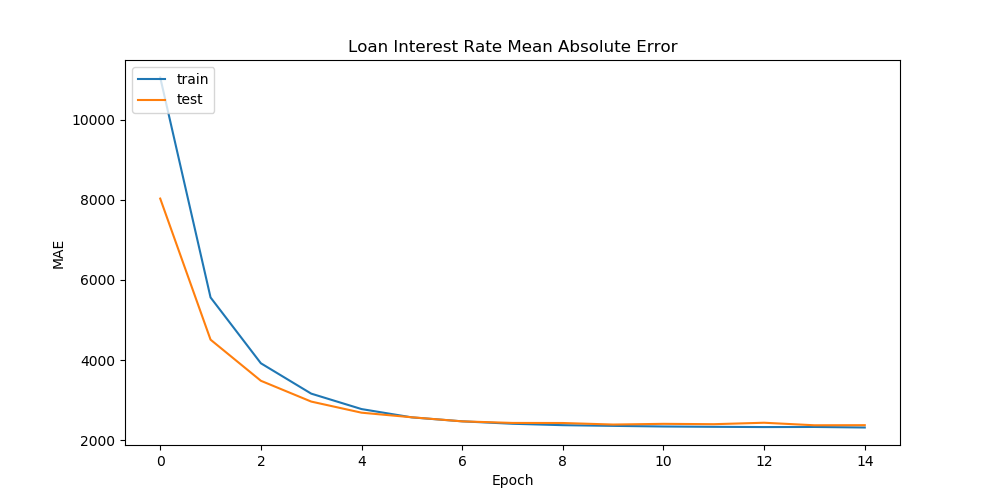

In [78]:
%matplotlib notebook  
import matplotlib.pyplot as plt  # Plotting library
plt.rcParams['figure.figsize'] = [10, 5]

plt.plot(mae)
plt.plot(val_mae)
plt.title('Loan Interest Rate Mean Absolute Error')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Above, we see that the model mean absolute error decreases sharply over the first view epochs and then slows down considerably.

Below, we can see iteratively how the model's weight adjustments affect performance - in this clip, we plot the actual observations against the predicted values after every 250th batch. A straight line implies perfect performance.

<IPython.core.display.Javascript object>


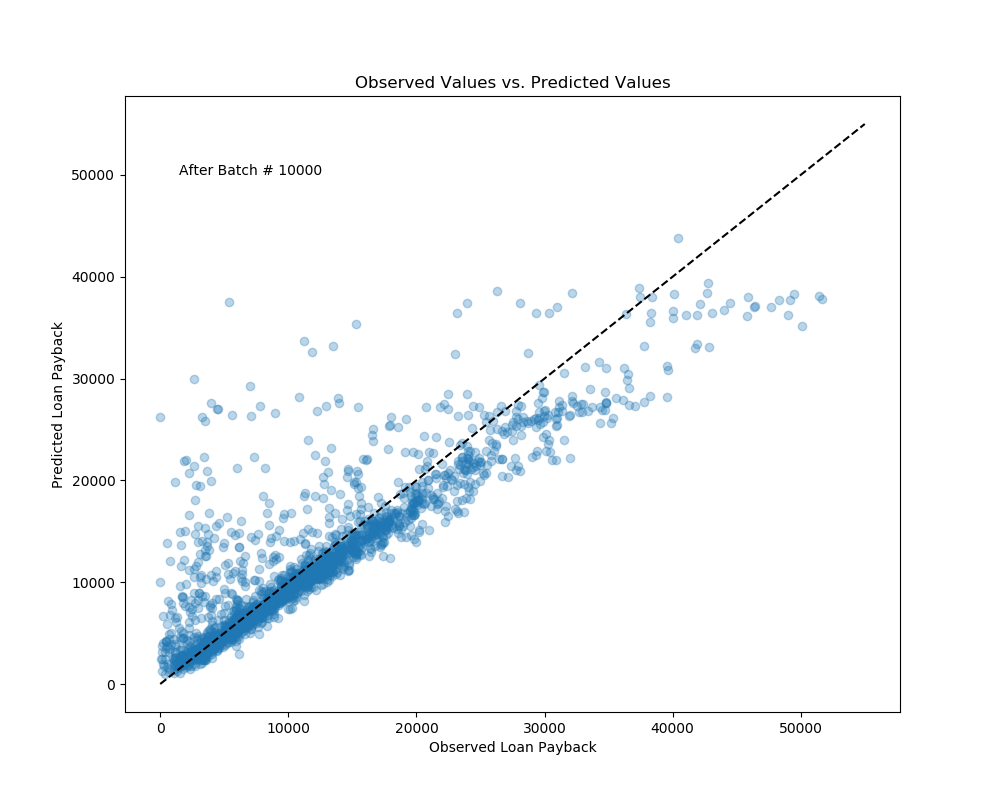

In [84]:
from time import sleep
plt.rcParams['figure.figsize'] = [10, 8]
fig = plt.figure()
fig.show()
i = 0
iterations = [1] + [x * 250 for x in range(1, 41)]

for prediction in predictor.val_predictions:
    plt.scatter(y_test[0:2000], prediction[0:2000], alpha=.3)
    plt.title('Observed Values vs. Predicted Values')
    plt.annotate('After Batch # {}'.format(iterations[i]), xy=(1500, 50000), xytext=(1500, 50000))
    plt.xlabel('Observed Loan Payback')
    plt.ylabel('Predicted Loan Payback')
    plt.plot([0, 55000], [0, 55000], 'k--')
    
    fig.canvas.draw()
    
    if i == 40:
        break
        
    sleep(.5)
    fig.clf()
    
    i+=1
    
    


Finally, to make predictions on any data set that fits the same format, we can use the `.predict()` method on our model and pass the independent variables as an argument:

In [41]:
X_test_df = pd.DataFrame(X_test, columns=X_vars)
X_test_df['Y actual'] = y_test
X_test_df['Y predicted'] = model.predict(X_test)
X_test_df[['Y actual', 'Y predicted']].head(20)

,Y actual,Y predicted
0,8133.153240,7190.462402
1,211.100000,1781.951172
2,3019.970000,2811.505127
3,8805.594414,12771.019531
4,1808.963512,1901.844360
5,15009.400000,13681.628906
6,14114.413170,13937.060547
7,10106.941070,10860.184570
8,10881.037880,10077.096680
9,24273.474270,21545.462891


## Conclusion

And that wraps up our intro to neural networks with Keras! By following through this notebook, you should have a general idea of resources to access some flat-file data, do a little bit of transformation, define a simple neural network architecture with Keras, and use the model to make predictions.

You can reach out to me with any questions or comments at:

* jared@stufft.us
* linkedin.com/in/jaredstufft

Happy training!

In [ ]:
%matplotlib notebook
# Code from above in one single script
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.layers import Dense
from keras.models import Sequential
from keras.callbacks import Callback, EarlyStopping
import matplotlib.pyplot as plt
from time import sleep

# Data Access
data = pd.read_csv('LoanStats.csv')

# Limit data set to variables we need
keep_vars = [
    'loan_amnt',
    'term',
    'emp_length',
    'home_ownership',
    'annual_inc',
    'verification_status',
    'issue_d',
    'dti',
    'delinq_2yrs',
    'earliest_cr_line',
    'inq_last_6mths',
    'open_acc',
    'revol_bal',
    'revol_util',
    'total_acc',
    'int_rate',
    'total_pymnt'
]

smaller_data = data[keep_vars]

# Remove any columns with missing data
smaller_data = smaller_data.dropna(how='any')

# Data Transformation and Cleaning

# Strip '%' from int_rate and revol_util and convert to a float
smaller_data['int_rate'] = smaller_data['int_rate'].str.replace('%', '').astype(float)
smaller_data['revol_util'] = smaller_data['revol_util'].str.replace('%', '').astype(float)

# Turn issue_d and earliest_cr_line into real datetime objects
from time import strptime
smaller_data['issue_d'] = pd.to_datetime(smaller_data['issue_d'], format='%b-%y')
smaller_data['earliest_cr_line'] = pd.to_datetime(smaller_data['earliest_cr_line'], format='%b-%y')

# Create a new column indicating the age of the oldest credit line
smaller_data['oldest_cr_age'] = smaller_data['issue_d'] - smaller_data['earliest_cr_line']
smaller_data['oldest_cr_age'] = smaller_data['oldest_cr_age'].dt.days

smaller_data.drop(['issue_d', 'earliest_cr_line'], axis=1, inplace=True)  # Get rid of date columns

# Rescale data to standard normal range using StandardScaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

numeric_cols = [col for col in smaller_data._get_numeric_data().columns if col != 'total_pymnt']

smaller_data[numeric_cols] = scaler.fit_transform(smaller_data[numeric_cols])

# Create dummy variables
data_with_dummies = pd.get_dummies(smaller_data, dtype=float)

# Separate X and y and create train/test splits
X_vars = [
    'loan_amnt',
    'annual_inc',
    'dti',
    'delinq_2yrs',
    'inq_last_6mths',
    'open_acc',
    'revol_bal',
    'revol_util',
    'total_acc',
    'oldest_cr_age',
    'term_ 36 months',
    'term_ 60 months',
    'emp_length_1 year',
    'emp_length_10+ years',
    'emp_length_2 years',
    'emp_length_3 years',
    'emp_length_4 years',
    'emp_length_5 years',
    'emp_length_6 years',
    'emp_length_7 years',
    'emp_length_8 years',
    'emp_length_9 years',
    'emp_length_< 1 year',
    'home_ownership_MORTGAGE',
    'home_ownership_NONE',
    'home_ownership_OTHER',
    'home_ownership_OWN',
    'home_ownership_RENT',
    'verification_status_Not Verified',
    'verification_status_Source Verified',
    'verification_status_Verified',
    'int_rate'
]

# Separate into X and y - a dataframe containing the independent variables and the dependent variable, respectively.
X = np.array(data_with_dummies[X_vars])
y = np.array(data_with_dummies['total_pymnt'])

# split into Train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.35)  # Put 235% of the data in the test set


# Model Definition
model = Sequential()

# define a dictionary with layer attributes and iterate.
nn_dict = {
    'n_nodes': [32, 15, 1],
    'activation': ['relu', 'relu', None]
}

n_layers = 3

model = Sequential()

for i in range(n_layers):
    
    if i == 0:  # If the first layer (input layer)
        layer = Dense(nn_dict['n_nodes'][i], input_dim=nn_dict['n_nodes'][i], activation=nn_dict['activation'][i])
        
    layer = Dense(nn_dict['n_nodes'][i], activation=nn_dict['activation'][i])
    
    model.add(layer)
    
model.compile(
    loss='mse', 
    optimizer='adamax',
    metrics=['mse', 'mae']
)

# Create a custom Callback to get model predictions
class Predictor(Callback):
    
    def on_train_begin(self, logs={}):
        
        self.val_predictions = []
        self.i = 1
    
    def on_batch_end(self, batch, logs={}):
        
        if i==1 or self.i % 250 == 0:
            self.val_predictions.append(self.model.predict(X_test))
        
        self.i += 1
        

# Intialize Callbacks
predictor = Predictor()
es = EarlyStopping( # Another callback that stops our training process early if val_loss doesn't improve
    patience=2,  # Checks for improvement over 2 epochs
    verbose=1
)  

# Train model
history = model.fit(
    X_train,  # Independent variables
    y_train,  # Dependent Variable
    validation_data=(X_test, y_test),  # Test data as a tuple
    epochs=25,  # One epoch is a complete pass through the data
    shuffle=True,  # Shuffle the dataset before training
    batch_size=20,
    callbacks = [predictor, es]
)

# Retrieve historical performance data
val_mae = history.history['val_mean_absolute_error']
mae = history.history['mean_absolute_error']

# Plot historical performance data
plt.rcParams['figure.figsize'] = [10, 5]
plt.plot(mae)
plt.plot(val_mae)
plt.title('Loan Interest Rate Mean Absolute Error')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


# Show comparison between predictions and observed values over batches
plt.rcParams['figure.figsize'] = [10, 8]
fig = plt.figure()
fig.show()
i = 0
iterations = [1] + [x * 250 for x in range(1, 41)]

for prediction in predictor.val_predictions:
    plt.scatter(y_test[0:2000], prediction[0:2000], alpha=.3)
    plt.title('Observed Values vs. Predicted Values')
    plt.annotate('After Batch # {}'.format(iterations[i]), xy=(1500, 50000), xytext=(1500, 50000))
    plt.xlabel('Observed Loan Payback')
    plt.ylabel('Predicted Loan Payback')
    plt.plot([0, 55000], [0, 55000], 'k--')
    
    fig.canvas.draw()
    
    if i == 40:
        break
        
    sleep(.5)
    fig.clf()
    
    i+=1
    